<a href="https://colab.research.google.com/github/isyoung21/Computational-Chemistry-/blob/main/%EC%A0%9C_1%EA%B0%95_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# series_data라는 1,2,3,4,5 값으로 구성된 series 만들기
series_data=pd.Series([1,2,3,4,5])
series_data

,0
0,1
1,2
2,3
3,4
4,5


In [ ]:
#numpy를 기반으로 만든 라이브러리 연산도 가능
data_sum=series_data.sum()
data_mean=series_data.mean()
print(f'합계:{data_sum},평균:{data_mean}')

합계:15,평균:3.0


In [ ]:
# 시리즈에서 컬럼 추가
score=pd.DataFrame([['가명',50,60],['나명',60,20]],columns=['이름','수학','과학'])
score

,이름,수학,과학
0,가명,50,60
1,나명,60,20


In [ ]:
score['이름']

,이름
0,가명
1,나명


데이터 전처리 기법

1. 데이터 정리
2. 데이터변환
3. 특성 엔지니어링
  - 변수 변환
  - 다항 특성 생성
  - 차원 축소
  - PCA (주성분 분석)
  - t-SNE, UMAP


In [ ]:
# 정규과 데이터 값을 0과 1 사이로 변환
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 예제 데이터 -1
data=np.array([[10,200],[15,300],[20,400]])
data

# Min-Max Scaler 초기화 및 적용
scaler = MinMaxScaler()
normalized_data=scaler.fit_transform(data)
print("정규화된 데이터:\n", normalized_data)


정규화된 데이터:
 [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [ ]:
# 표준화 데이터를 평균 0, 표준편차 1로 변환

from sklearn.preprocessing import StandardScaler

# Standard Scaler 초기와 및 적용
scaler=StandardScaler()
standardized_data=scaler.fit_transform(data)
print("표준화된 데이터:\n", standardized_data)


표준화된 데이터:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [ ]:
# PCA 기법
# 1. 데이터 생성 - 난수를 사용해 3차원 데이터 생성
np.random.seed(42)
data=np.random.rand(100,3)*10   # 100개의 샘플, 3개의 특성
df=pd.DataFrame(data,columns=['Feature_1','Feature_2','Feature_3'])
print("원본 데이터(상위 5개):\n",df.head())

원본 데이터(상위 5개):
    Feature_1  Feature_2  Feature_3
0   3.745401   9.507143   7.319939
1   5.986585   1.560186   1.559945
2   0.580836   8.661761   6.011150
3   7.080726   0.205845   9.699099
4   8.324426   2.123391   1.818250


In [ ]:
# 2. 데이터 표준화
scaler=StandardScaler()
data_standarized=scaler.fit_transform(df)
print("\n표준화된 데이터(상위 5개):\n",data_standarized[:5])


표준화된 데이터(상위 5개):
 [[-0.35958026  1.4198383   0.82216804]
 [ 0.42811633 -1.15479213 -1.18711031]
 [-1.47181267  1.14595419  0.36561862]
 [ 0.81266807 -1.59356748  1.65209819]
 [ 1.24978474 -0.97232681 -1.09700508]]



PCA 결과 데이터(상위 5개):
    Principal_Component_1  Principal_Component_2
0              -0.161857               1.661741
1               0.537815              -1.622229
2              -0.757885               1.273331
3              -1.095738              -0.596021
4               1.119462              -1.476950

설명분산 비율:
 [0.37032399 0.32900197]

누적 설명분산 비율:
 [0.37032399 0.69932595]


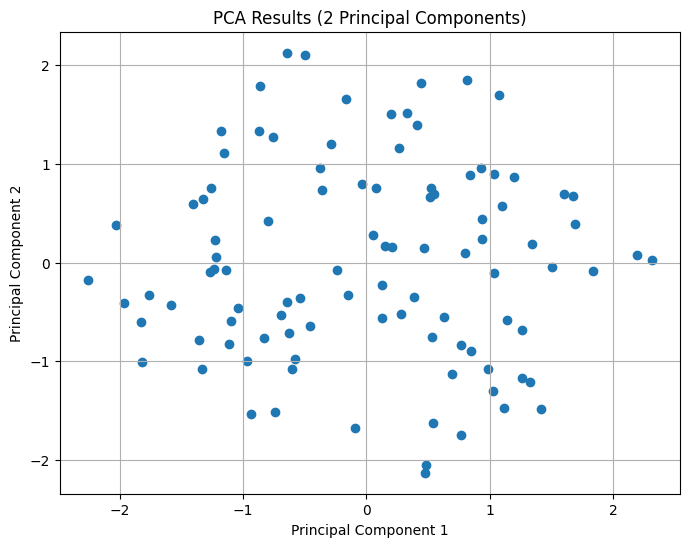

In [ ]:
# 3. 3차원 -> 2차원 축소 - PCA 초기화 : 주성분 개수를 2개로 설정
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

# PCA 적용
principal_components=pca.fit_transform(data_standarized)

# 결과를 DataFrame으로 변환
df_pca=pd.DataFrame(data=principal_components, columns=['Principal_Component_1', 'Principal_Component_2'])
print("\nPCA 결과 데이터(상위 5개):\n", df_pca.head())

# 각 주성분의 설명분산 비율
explained_variance_ratio=pca.explained_variance_ratio_
print("\n설명분산 비율:\n", explained_variance_ratio)

# 누적 설명분산
cumulative_variance=np.cumsum(explained_variance_ratio)
print("\n누적 설명분산 비율:\n", cumulative_variance)

# PCA 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_pca['Principal_Component_1'],df_pca['Principal_Component_2'])
plt.title('PCA Results (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()